In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import pickle
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import os

In [2]:
import sys
print(sys.version)

3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]


In [3]:
mj=joblib.load('/Users/rahul/Downloads/IAM_Words/act_model__joblib_10_epochs')
cnn=joblib.load('/Users/rahul/Downloads/IAM_Words/DTvsHW_Model')

In [4]:
char_set={'M', "'", '/', ')', 'm', 'q', 'k', 'N', '!', ',', 'o', 'W', '+', '#', '0', 'y', 'd', 'j', 'h', 'I', '-', 'Z', 'F', 'Y', 'g', 'P', 'V', 'e', 'z', 'R', '5', 'p', '1', '?', 'x', 'c', 'D', '.', 'C', 'K', 'w', 'v', 'G', '(', 'T', '3', 'S', ':', 'i', 'A', 'E', 'a', 'U', '6', 'b', 't', '*', '9', '8', 'l', '4', ';', 'X', '2', 's', '7', 'r', 'J', 'O', 'Q', 'B', 'n', 'f', '&', 'u', '"', 'L', 'H'}
char_list = sorted(list(char_set))

In [5]:
def process_image(img):
    """
    Converts image to shape (32, 128, 1) & normalize
    """
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    w, h = img.shape

    # Aspect Ratio Calculation
    new_w = 32
    new_h = int(h * (new_w / w))
    img = cv2.resize(img, (new_h, new_w))
    w, h = img.shape

    img = img.astype('float32')

    # Converts each to (32, 128, 1)
    if w < 32:
        add_zeros = np.full((32-w, h), 255)
        img = np.concatenate((img, add_zeros))
        w, h = img.shape

    if h < 128:
        add_zeros = np.full((w, 128-h), 255)
        img = np.concatenate((img, add_zeros), axis=1)
        w, h = img.shape

    if h > 128 or w > 32:
        dim = (128,32)
        img = cv2.resize(img, dim)

    img = cv2.subtract(255, img)
    img = np.expand_dims(img, axis=2)

    # Normalize
    img = img / 255
    return img

In [6]:
image = cv2.imread('/Users/rahul/Downloads/archive-3/TestSet/X/X_036.jpeg')
base_image = image.copy()

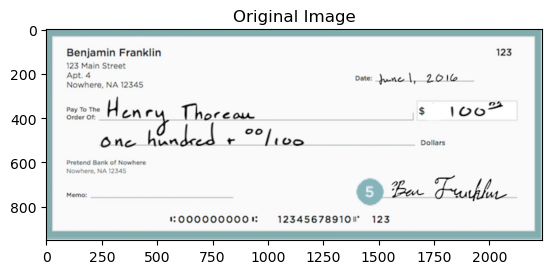

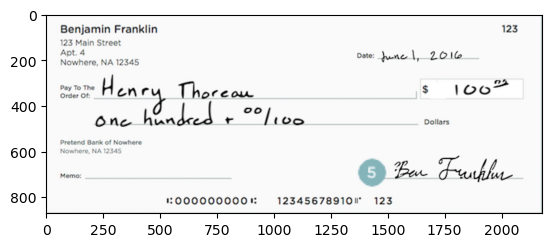

In [7]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Define the border to be removed (example values)
top_border = 40
bottom_border = 40
left_border = 30
right_border = 30

# Crop the image using numpy slicing
cropped_img = image[top_border:image.shape[0] - bottom_border, left_border:image.shape[1] - right_border]

# Display the cropped image
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

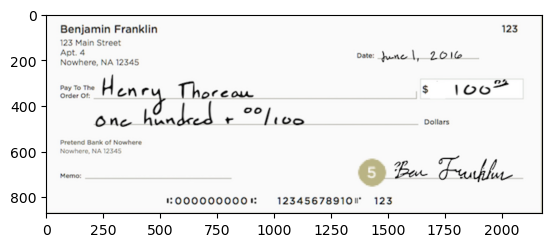

In [8]:
image=cropped_img.copy()
base_image=image.copy()
plt.imshow(image,cmap='gray')

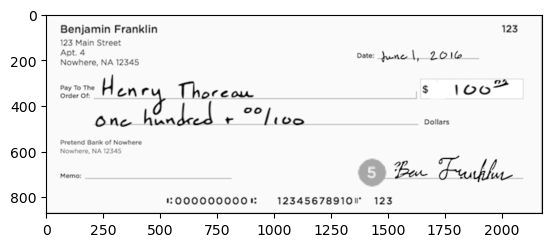

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/grey_check.png", gray)
plt.imshow(gray,cmap='gray')

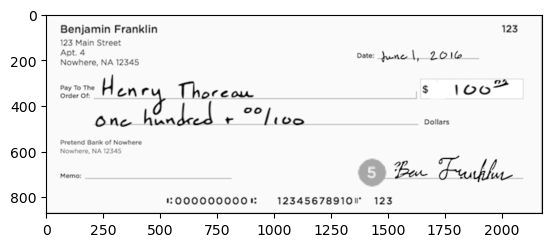

In [10]:
blur = cv2.GaussianBlur(gray, (7,7), 0)
cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/blur_check.png", blur)
plt.imshow(gray,cmap='gray')

In [11]:
print(gray.shape)

(872, 2180)


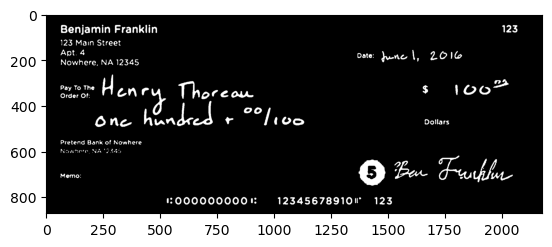

In [12]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/threshold_check.png", thresh)
plt.imshow(thresh,cmap='gray')

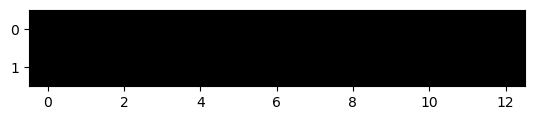

In [13]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 2))
cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/kernal_check.png", kernal)
import matplotlib.pyplot as plt
plt.imshow(kernal,cmap='gray')

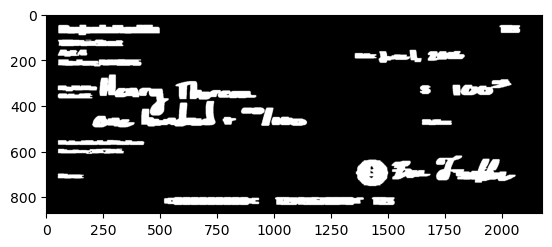

In [14]:
dilate = cv2.dilate(thresh, kernal, iterations=2)
cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/dilate_check.png", dilate)
plt.imshow(dilate,cmap='gray')

In [15]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

In [16]:
type(cnts)

list

In [17]:
x=image.shape[1]
print('x:-',x)
y=image.shape[0]
print('y:-',y)
width_of_image=x
height_of_image=y
print(0.5*width_of_image)

x:- 2180
y:- 872
1090.0


no.of contours are  32
1/1 [==============================] - 0s 7ms/step
x:-,y:-,w:-,h:- 52 347 152 23
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 470ms/step
[[[1.6730735e-15 4.5041651e-13 1.9391699e-05 ... 8.4649832e-10
   2.4339728e-08 1.7818437e-04]
  [9.5784354e-22 2.3061731e-17 5.7460602e-11 ... 2.0885041e-12
   9.0392608e-13 9.9992001e-01]
  [1.0225792e-21 1.5962938e-17 2.0045151e-11 ... 3.2211969e-13
   6.7476968e-10 9.9978250e-01]
  ...
  [1.7441842e-15 1.7408443e-11 2.0552228e-14 ... 7.1978512e-08
   6.0695845e-12 9.9977988e-01]
  [1.1686280e-15 2.0771907e-11 4.6382122e-14 ... 6.7575968e-08
   9.3241378e-12 9.9977499e-01]
  [1.4012159e-15 3.0198125e-12 1.0629648e-13 ... 1.5735124e-07
   8.6950898e-12 9.9976641e-01]]]
out is  [[45 30 45 30 69 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

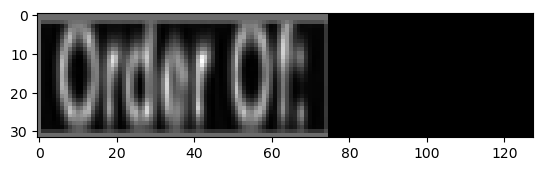

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 54 47 446 46
HW
1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 203 446 187 51
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 14ms/step
[[[2.0088998e-15 2.1782003e-11 3.5255271e-15 ... 1.6034911e-10
   2.6995707e-15 9.9990964e-01]
  [8.0548485e-11 7.6284294e-08 4.1954980e-08 ... 3.7955945e-06
   1.1528039e-12 9.1758404e-05]
  [3.4054192e-20 1.6783666e-14 5.3064298e-18 ... 5.4905455e-12
   7.3032461e-20 9.9997544e-01]
  ...
  [1.6491742e-18 1.1268100e-14 7.2684210e-19 ... 2.8904335e-08
   2.6370589e-13 9.9997866e-01]
  [1.8193230e-18 1.3878669e-14 1.3106690e-18 ... 3.4030208e-08
   6.1118780e-13 9.9997807e-01]
  [3.0326110e-18 2.0754219e-15 5.5614231e-18 ... 1.5039667e-07
   8.3822782e-13 9.9998188e-01]]]
out is  [[66 65 56 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

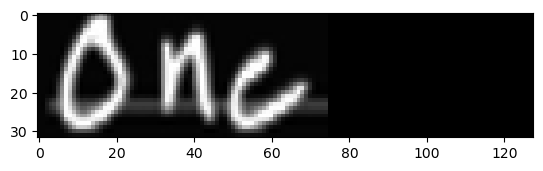

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 235 265 305 180
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 17ms/step
[[[3.9654533e-11 2.9692142e-09 7.9664784e-07 ... 7.9233692e-10
   3.4790688e-11 2.9964363e-06]
  [1.0571259e-18 3.9506448e-18 1.0546463e-15 ... 4.3764357e-11
   6.2170866e-18 9.9999046e-01]
  [3.8113611e-17 8.5614827e-19 4.1430691e-13 ... 2.8898666e-07
   1.6913869e-14 9.9126595e-01]
  ...
  [1.1494368e-16 5.2452194e-13 6.2636546e-16 ... 1.0157769e-07
   5.0971844e-12 9.9997509e-01]
  [1.1577473e-16 6.8688393e-13 1.1869540e-15 ... 1.1308534e-07
   9.8658868e-12 9.9997318e-01]
  [3.2687233e-17 5.4341846e-14 3.0819387e-15 ... 2.4129824e-07
   5.0963300e-12 9.9997139e-01]]]
out is  [[33 56 65 69 76 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

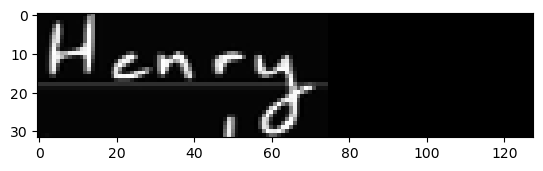

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 419 381 326 112
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 16ms/step
[[[1.4378184e-14 6.5724826e-09 6.5840396e-07 ... 3.2877587e-08
   1.5637016e-07 7.4685893e-05]
  [1.8267448e-19 3.5291374e-15 4.8980798e-14 ... 1.2219759e-10
   9.7126942e-12 9.9884713e-01]
  [7.9730607e-23 4.7064132e-17 5.8079435e-17 ... 6.9102590e-13
   5.9802132e-14 9.8289019e-01]
  ...
  [3.4339536e-17 9.4904567e-14 1.6781095e-15 ... 2.7929360e-07
   1.3737540e-11 9.9990666e-01]
  [2.8533440e-17 1.2283906e-13 3.5369335e-15 ... 2.6070344e-07
   2.2175106e-11 9.9990869e-01]
  [1.9850207e-17 3.9935852e-14 1.6871792e-14 ... 7.5769879e-07
   3.1809697e-11 9.9981266e-01]]]
out is  [[71 59 65 55 56 55 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

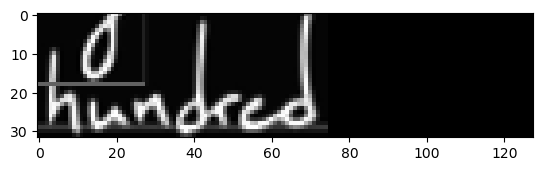

1/1 [==============================] - 0s 9ms/step
x:-,y:-,w:-,h:- 519 802 418 35
HW
1/1 [==============================] - 0s 9ms/step
x:-,y:-,w:-,h:- 569 294 356 81
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 15ms/step
[[[2.2306222e-18 1.0889195e-11 7.3238342e-12 ... 5.3367870e-14
   9.1402103e-13 9.3535270e-08]
  [4.9949294e-22 1.8473852e-15 9.1970024e-15 ... 6.3712512e-13
   1.3424820e-13 9.7196734e-01]
  [3.2832729e-22 2.0051624e-17 4.0988172e-17 ... 1.3014883e-13
   4.1917026e-15 9.9998248e-01]
  ...
  [8.1029832e-17 5.2612524e-12 1.3778118e-16 ... 9.6078434e-09
   3.1988990e-12 9.9993670e-01]
  [5.4761702e-17 6.2992515e-12 2.4285912e-16 ... 8.9877190e-09
   4.4247284e-12 9.9993324e-01]
  [1.0739097e-16 2.1789740e-12 7.0160867e-16 ... 4.6436003e-08
   1.2874248e-11 9.9986482e-01]]]
out is  [[45 59 66 69 56 52 65 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

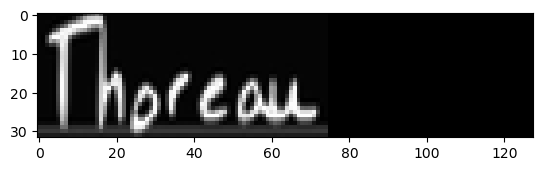

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 991 450 156 40
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 15ms/step
[[[3.90074778e-10 2.56633462e-06 9.19012564e-08 ... 3.97538543e-06
   1.36466465e-08 8.95528123e-02]
  [2.70388825e-16 4.74735572e-12 1.58593485e-14 ... 4.44080595e-09
   1.90276245e-14 9.99951839e-01]
  [1.07586390e-20 9.94979745e-16 1.08115219e-17 ... 1.72834978e-12
   7.81590243e-19 9.99998689e-01]
  ...
  [3.21129774e-18 3.12026541e-14 1.37798850e-18 ... 2.14781881e-08
   1.46694885e-13 9.99989629e-01]
  [3.40588515e-18 4.06526246e-14 2.41983747e-18 ... 2.35442119e-08
   3.16098683e-13 9.99989152e-01]
  [2.30658962e-18 4.48229634e-15 1.26449107e-17 ... 1.40879365e-07
   3.14437658e-13 9.99986768e-01]]]
out is  [[14 13 66 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

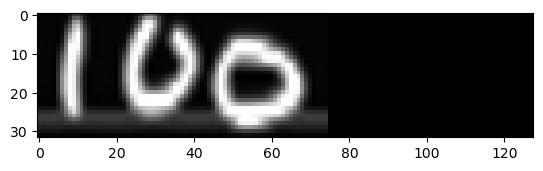

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 1007 802 390 35
HW
1/1 [==============================] - 0s 9ms/step
x:-,y:-,w:-,h:- 1432 802 101 35
HW
1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 1462 157 189 57
HW
1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 1519 643 171 82
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 15ms/step
[[[4.5584840e-14 2.6744262e-06 2.8082041e-09 ... 1.2278079e-10
   2.8405645e-07 9.9968052e-01]
  [4.9535005e-14 1.2495234e-06 2.5438280e-06 ... 1.5010225e-09
   5.0213560e-04 1.5947955e-02]
  [1.3807933e-19 3.6961310e-16 9.6618670e-14 ... 1.0438735e-11
   5.9482258e-10 9.9999797e-01]
  ...
  [3.2304864e-17 3.6581504e-13 9.5972175e-17 ... 2.3112950e-08
   7.3705963e-12 9.9995768e-01]
  [1.9108722e-17 5.0901617e-13 2.9421369e-16 ... 2.0933991e-08
   1.2182894e-11 9.9995875e-01]
  [1.4627002e-17 7.6824967e-14 1.0263007e-15 ... 6.9589120e-08
   8.2393103e-12 9.9

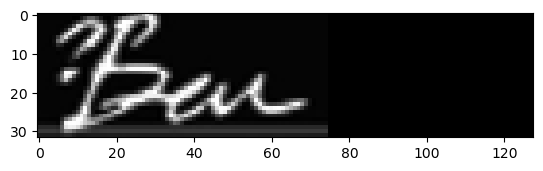

1/1 [==============================] - 0s 8ms/step
x:-,y:-,w:-,h:- 1678 162 163 43
HW
1/1 [==============================] - 0s 9ms/step
x:-,y:-,w:-,h:- 1714 620 350 119
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 15ms/step
[[[2.22263918e-09 2.35327735e-09 1.44241482e-03 ... 2.58206292e-08
   5.07125549e-07 7.19315995e-06]
  [4.09680190e-16 6.34520216e-16 2.42935283e-10 ... 3.71336822e-10
   1.28246086e-11 9.93139446e-01]
  [2.22819941e-17 1.26669817e-15 1.94658206e-10 ... 7.06350950e-12
   3.37308144e-13 9.95966196e-01]
  ...
  [7.44783365e-17 2.68745882e-13 3.71409058e-17 ... 4.81819740e-08
   2.59745307e-12 9.99943852e-01]
  [7.44882031e-17 3.69339623e-13 7.51583848e-17 ... 5.33410827e-08
   4.97471465e-12 9.99942899e-01]
  [6.86166766e-17 1.21972690e-13 3.49626587e-16 ... 2.15655390e-07
   1.29281898e-11 9.99933720e-01]]]
out is  [[30 72 70 71 59 64 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text

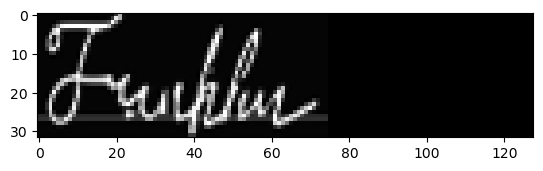

1/1 [==============================] - 0s 9ms/step
x:-,y:-,w:-,h:- 1823 286 223 70
HW
(128, 300)
(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 15ms/step
[[[5.91952756e-13 2.41912212e-10 2.15998643e-11 ... 1.20263110e-07
   5.71619696e-11 9.99984980e-01]
  [1.57882152e-08 4.94692313e-06 3.32618015e-06 ... 3.75131820e-03
   1.40168086e-05 1.27464812e-03]
  [3.74924344e-17 2.33882683e-13 5.57719786e-18 ... 1.95863270e-10
   3.72862514e-14 9.99995232e-01]
  ...
  [4.49104915e-16 3.34308861e-13 3.47503710e-16 ... 1.00562005e-07
   3.97018442e-12 9.99939203e-01]
  [4.70642105e-16 4.80971925e-13 7.46797874e-16 ... 1.12168408e-07
   9.09041505e-12 9.99936104e-01]
  [1.28203333e-16 7.04060088e-14 3.21246457e-15 ... 2.91460537e-07
   4.10576347e-12 9.99927998e-01]]]
out is  [[73 66  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

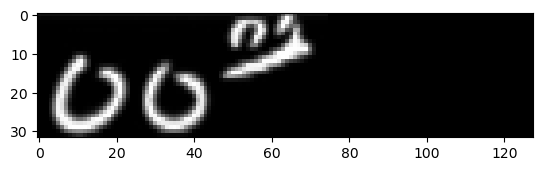

1/1 [==============================] - 0s 8ms/step
no of handwritten contors are  9
a is  32
['TETEr', 'one', 'Henry', 'thnded', 'Thorean', '10o', 'Be', 'Eusthm', "vo'"]


In [21]:
import numpy as np
a=int(0)
no_of_c=0
list_strings=[]
results  = []
print('no.of contours are ',len(cnts))
aspect_ratios=[]
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 1 and w > 1:
        roi=image[y:y+h,x:x+w]
        cv2.imwrite("/Users/rahul/Downloads/boxes_check_2/original_roi.png",roi)
        predictable_img = cv2.resize(roi, (300,128))
        a+=1
        
        # Resize the image to the required size (64, 64)
        test_image = cv2.resize(predictable_img, (64, 64))
        test_image=np.expand_dims(test_image,axis=0)
        if a==1:
            plt.imshow(predictable_img,cmap='gray')
        
        result=cnn.predict(test_image)
        
        if result[0][0]==1:
              prediction='HW'
        else:
              prediction='DT'
                
        if prediction == 'HW':
            
            S=""
            print('x:-,y:-,w:-,h:-',x,y,w,h)
            print(prediction)
            if( y < 0.2 * height_of_image or y > 0.8 * height_of_image or w > width_of_image/1.5):
                continue
            else:
                no_of_c+=1
                #plt.imshow(predictable_img,cmap='gray')
                boxes=cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
                predictable_img = cv2.cvtColor(predictable_img, cv2.COLOR_BGR2GRAY)
                print(predictable_img.shape)
                S=first1(predictable_img)
                list_strings.append(S)

                if no_of_c==3:
                    rd_hw_img=predictable_img
                    plt.imshow(rd_hw_img,cmap='gray')

print('no of handwritten contors are ',no_of_c)
cv2.imwrite("/Users/rahul/Downloads/boxes_check/boxes_check_onlyHW.png", image)
print('a is ',a)
print(list_strings)


(128, 300)


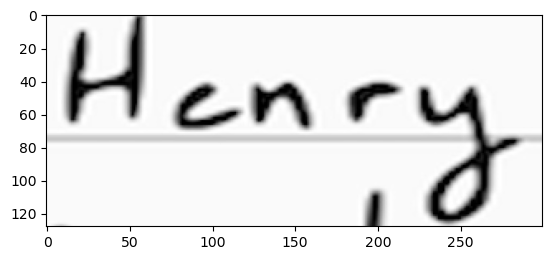

In [22]:
predictable_img=rd_hw_img
print(predictable_img.shape)
plt.imshow(predictable_img,cmap='gray')

In [23]:
def first1(predictable_img):
    predictable_array_images=[]
    predictable_img2 = process_image(predictable_img)
    predictable_array_images.append(predictable_img2)
    print(predictable_array_images[0].shape)
    bimbon_images = np.array(predictable_array_images)
    bimbon_images = tf.expand_dims(bimbon_images, axis=0)
    print(bimbon_images[0].shape)
    # predict outputs on validation images
    prediction = mj.predict(bimbon_images[0])

    print(prediction)

    # use CTC decoder
    decoded = K.ctc_decode(prediction,   
                           input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                           greedy=True)[0][0]

    out = K.get_value(decoded)
    print('out is ',out)

    for i, x in enumerate(out):
        print("predicted text = ", end = '')
        S=""
        for p in x:
            if int(p) != -1:
                #print(char_list[int(p)], end = '')
                S+=char_list[int(p)]
        new_shape = (32, 128)  # Example new shape
        reshaped_tensor = tf.reshape(bimbon_images[0], new_shape)
        plt.imshow(reshaped_tensor,cmap=plt.cm.gray)
        plt.show()
        return S
        print('\n')

(32, 128, 1)
(1, 32, 128, 1)
1/1 [==============================] - 0s 22ms/step
[[[3.9654533e-11 2.9692142e-09 7.9664784e-07 ... 7.9233692e-10
   3.4790688e-11 2.9964363e-06]
  [1.0571259e-18 3.9506448e-18 1.0546463e-15 ... 4.3764357e-11
   6.2170866e-18 9.9999046e-01]
  [3.8113611e-17 8.5614827e-19 4.1430691e-13 ... 2.8898666e-07
   1.6913869e-14 9.9126595e-01]
  ...
  [1.1494368e-16 5.2452194e-13 6.2636546e-16 ... 1.0157769e-07
   5.0971844e-12 9.9997509e-01]
  [1.1577473e-16 6.8688393e-13 1.1869540e-15 ... 1.1308534e-07
   9.8658868e-12 9.9997318e-01]
  [3.2687233e-17 5.4341846e-14 3.0819387e-15 ... 2.4129824e-07
   5.0963300e-12 9.9997139e-01]]]
out is  [[33 56 65 69 76 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1]]
predicted text = 

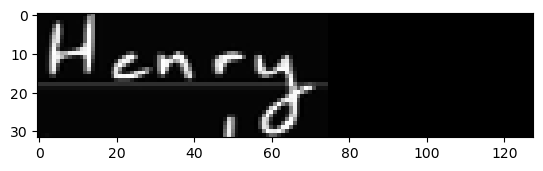

String is  Henry


In [24]:
S=""
S=first1(predictable_img)
print("String is ",S)

In [25]:
# predict outputs on validation images
prediction = mj.predict(bimbon_images[0])

print(prediction)

# use CTC decoder
decoded = K.ctc_decode(prediction,   
                       input_length=np.ones(prediction.shape[0]) * prediction.shape[1],
                       greedy=True)[0][0]

out = K.get_value(decoded)
print('out is ',out)

for i, x in enumerate(out):
    print("predicted text = ", end = '')
    S=""
    for p in x:
        if int(p) != -1:
            #print(char_list[int(p)], end = '')
            S+=char_list[int(p)]
    new_shape = (32, 128)  # Example new shape
    reshaped_tensor = tf.reshape(bimbon_images[0], new_shape)
    plt.imshow(reshaped_tensor,cmap=plt.cm.gray)
    plt.show()
    print("printed string is ",S)
    print('\n')

NameError: name 'bimbon_images' is not defined

In [ ]:
entities=[]
for item in results:
    item=item.strip().replace("\n","")
    item=item.split(" ")[0]
    if len(item)>0:
        if item[0].isalnum()==1 and item[0].isnumeric()==0:
            item=item.split("-")[0].replace(",","").replace(".","").replace(";","")
            entities.append(item)
            print(item)

In [ ]:
entities=list(set(entities))
print(entities)

In [ ]:
plt.imshow(base_image,cmap='gray')

In [ ]:
import pytesseract
text = pytesseract.image_to_string(predictable_img)
print(text)